In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv


**Overview**

The kidney-stone-dataset.csv is a comma-separated values file containing data on patients with kidney stones. The file has 90 rows and 7 columns, with each row representing a patient and each column providing information on various characteristics and laboratory test results. The dataset also includes a target variable, "Risk of Stone", which is a continuous variable representing the risk of developing kidney stones. This dataset can be used for tasks such as predicting the risk of kidney stones based on patient characteristics and test results.


This kidney stone dataset contains 12 features related to the risk of developing kidney stones, including age, gender, weight, height, family history, and various blood and urine measurements. The dataset includes 180 records, and the target variable is a continuous value representing the risk of developing kidney stones. The dataset is useful for building predictive models to identify individuals at high risk for kidney stones, which can aid in the development of prevention and treatment strategies.


The kidney-stone-dataset.csv is a dataset containing information on 90 patients with kidney stones, including characteristics such as age, gender, and stone type, as well as laboratory test results. The dataset also includes a target variable, "Risk of Stone", which is a continuous variable representing the risk of developing kidney stones. This dataset can be used for tasks such as predicting the risk of kidney stones based on patient characteristics and test results.

**Import Required Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

**Read Dataset**

In [ ]:
train = pd.read_csv('/kaggle/input/playground-series-s3e12/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e12/test.csv')

**Exploratory data analysis-EDA**

In [ ]:
# get a part of data
train.head(10)

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
5,5,1.025,6.90,947,28.4,395,2.64,1
6,6,1.008,5.09,371,15.5,159,2.17,1
7,7,1.015,5.53,450,8.1,170,1.16,0
8,8,1.025,7.38,736,25.3,418,1.52,0
9,9,1.017,6.61,527,20.0,75,4.49,1


**Gravity**: Urine density relative to water, which indicates the concentration of dissolved substances.

**pH**: A scale ranging from 1 to 14 that measures the acidity or alkalinity of an aqueous solution; 7 being neutral.

**Osmo**: Osmolality, the concentration of osmoles (particles that contribute to osmotic pressure) in a solution, expressed as milliosmoles per liter (mOsm/L) in biological systems.

**Cond**: Electrical conductivity, a measure of a liquid's ability to conduct electricity, which depends on the number of ions per unit volume and their drift velocity.

**Urea**: Urea concentration in the urine, measured in millimoles per liter (mmol/L).

**Calc**: Calcium concentration in the urine, measured in millimoles per liter (mmol/L).

**Target**: The presence (True/False) of a kidney stone based on the analysis of the above urine parameters.

In [ ]:
# get info about data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [ ]:
# get information statictics 
train.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


<Axes: xlabel='target', ylabel='count'>

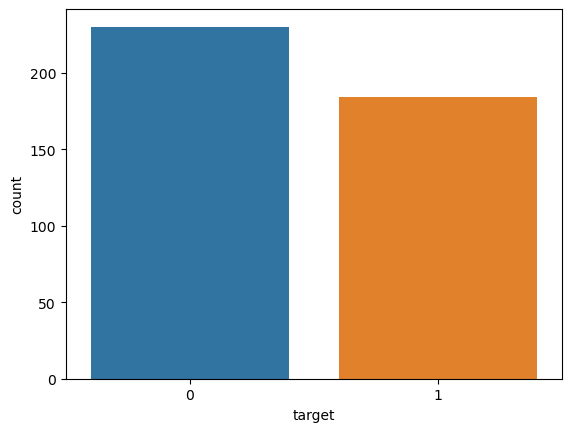

In [ ]:
# countplot for target
sns.countplot(x="target",data=train)

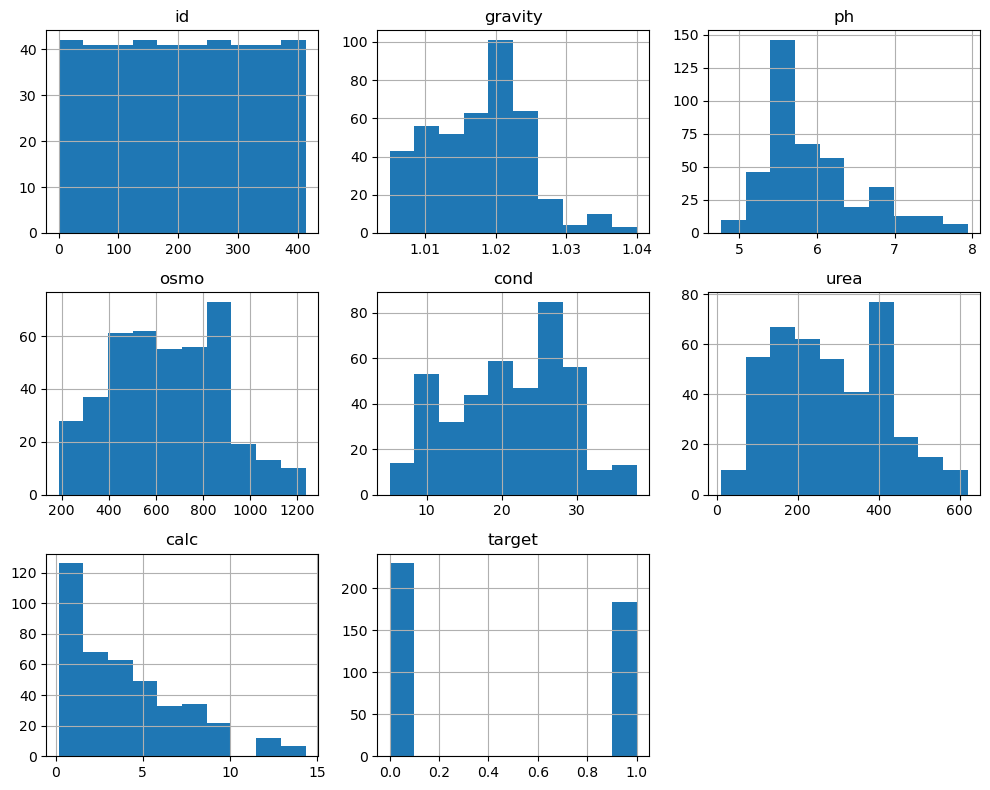

In [ ]:
# Histograms of numerical columns
train.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

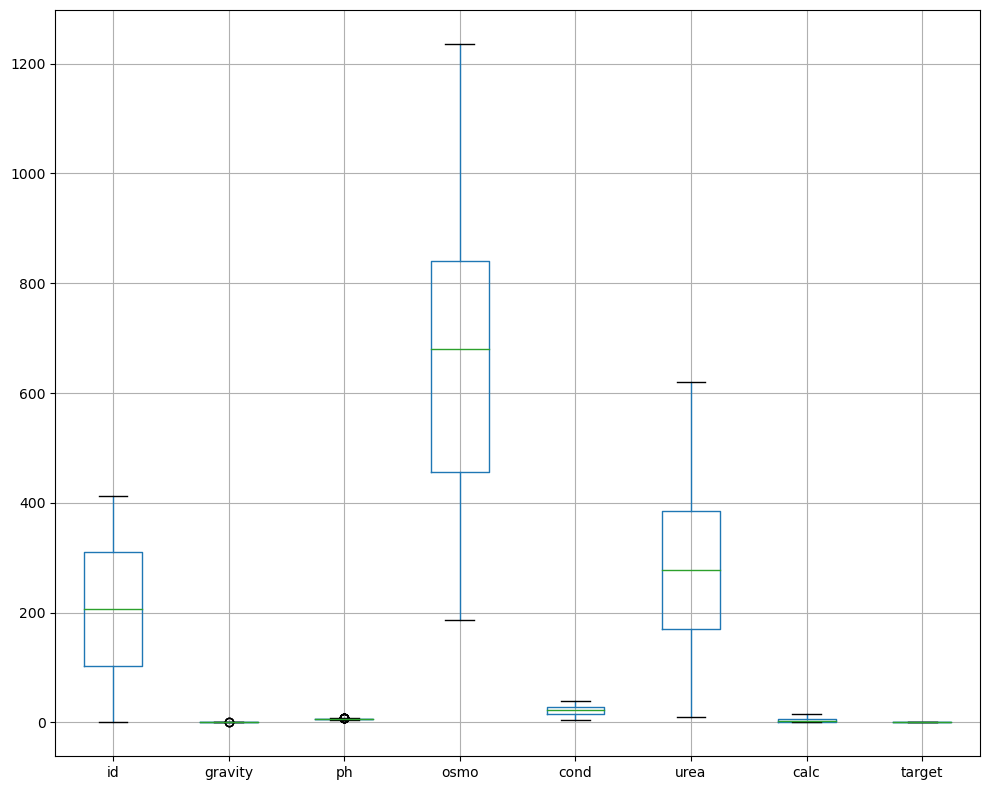

In [ ]:
# Box plots of numerical columns
train.boxplot(figsize=(10, 8))
plt.tight_layout()
plt.show()

**Heat map of correlation matrix**

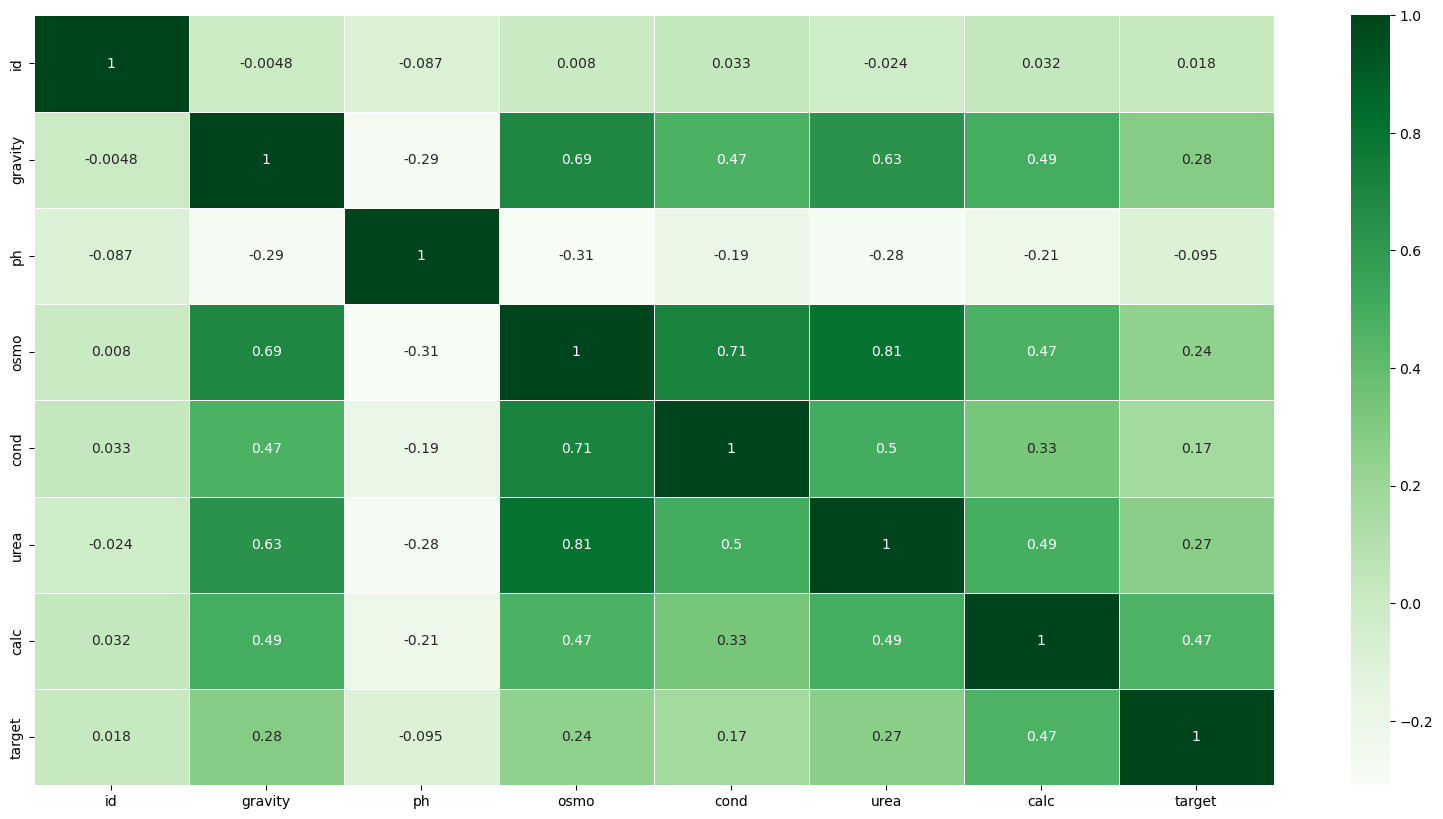

In [ ]:
# get the correlation between features 
# Calculate the correlation matrix
corr = train.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr,annot=True,linewidth=0.4,cmap='Greens')
plt.show()

<Axes: >

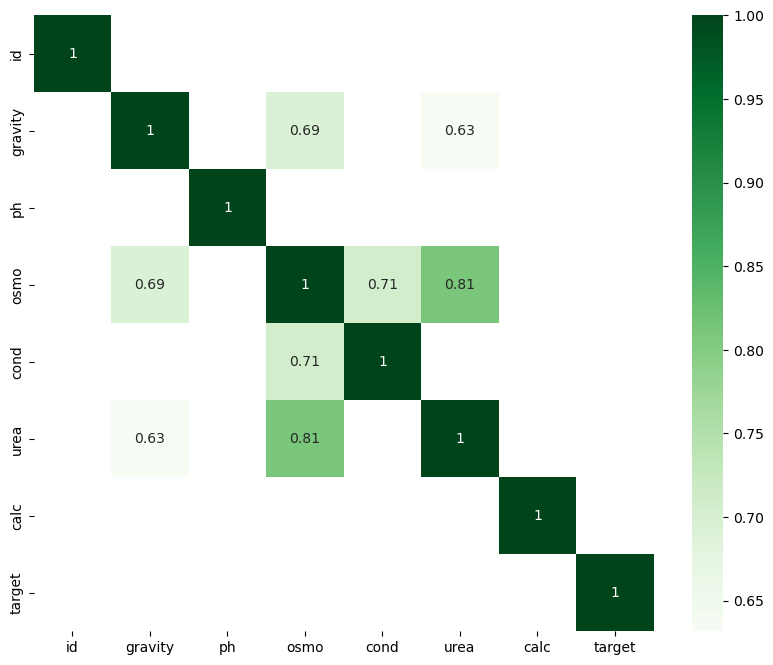

In [ ]:
#filtering the fatures with correlation greater than 0.5
hcr=corr[corr>=0.5]
plt.figure(figsize=(10,8))
sns.heatmap(hcr,annot=True,cmap='Greens')

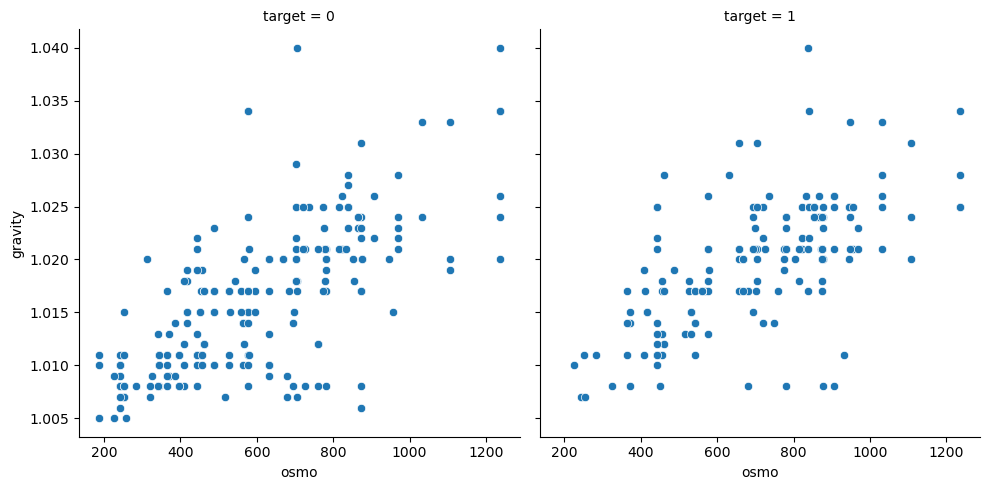

In [ ]:

sns.relplot(x="osmo",y="gravity",col="target",data=train,kind="scatter")
plt.show()

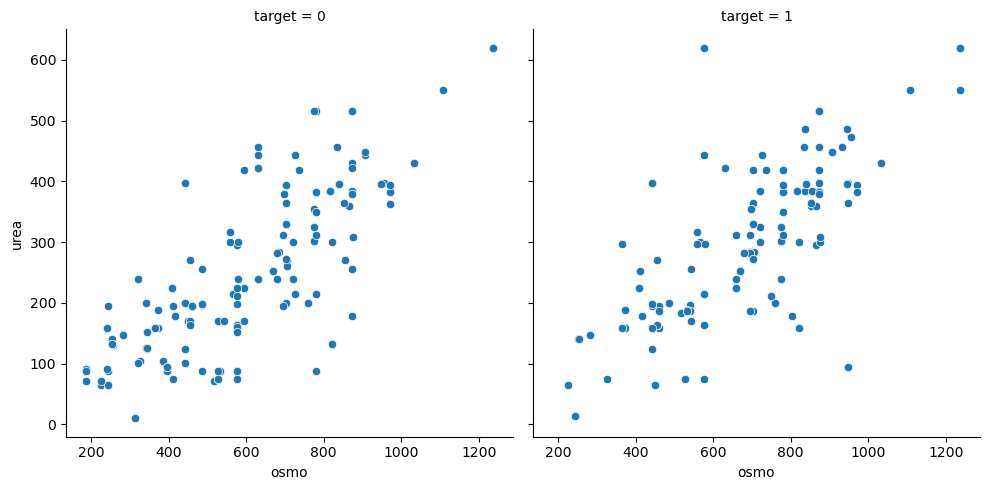

In [ ]:
sns.relplot(x="osmo",y="urea",col="target",data=train,kind="scatter")
plt.show()

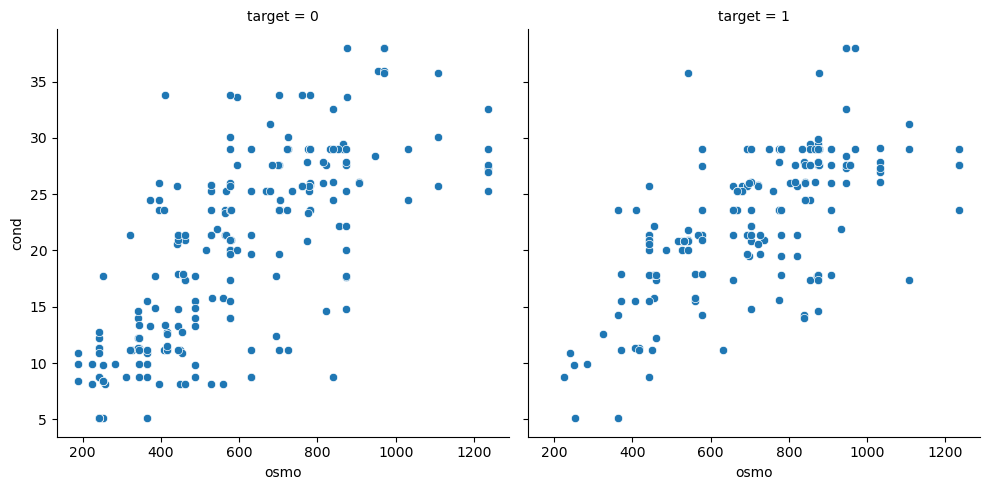

In [ ]:
sns.relplot(x="osmo",y="cond",col="target",data=train,kind="scatter")
plt.show()

 **Highly correlated features:**

gravity and osmo

osmo and urea

cond and osmo


- result : 
osmo the most feature will predict the target

<Axes: >

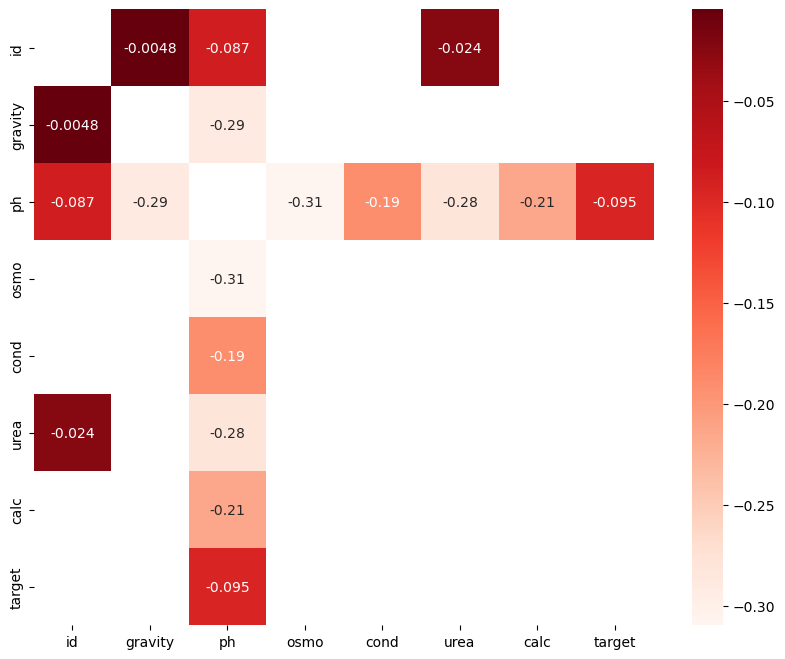

In [ ]:
#filtering the fatures with correlation less than 0
hcr=corr[corr<=0]
plt.figure(figsize=(10,8))
sns.heatmap(hcr,annot=True,cmap='Reds')

**PH have low correlation with all features , so that I will Drop it from train and test** 

**Data Preprocessing**

In [ ]:
# Drop ph column based on the correlation
train.drop('ph', axis=1,inplace=True)
test.drop('ph', axis=1,inplace=True)

**Check Null Values** 

In [ ]:
# check null values in train data
train.isna().sum()

id         0
gravity    0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

- No null values in Train Data 

In [ ]:
# check null values in test data
test.isna().sum()

id         0
gravity    0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

- No null values in Test Data

**Check Duplication in Train**

In [ ]:
duplicates = train .duplicated()
print(np.sum(duplicates))

0


- No duplicate in train data

**Check Duplication in Test**

In [ ]:
duplicates = test.duplicated()
print(np.sum(duplicates))

0


No duplicate in test data

**Hypothesis Test**

**Check Normality for Target graphically**

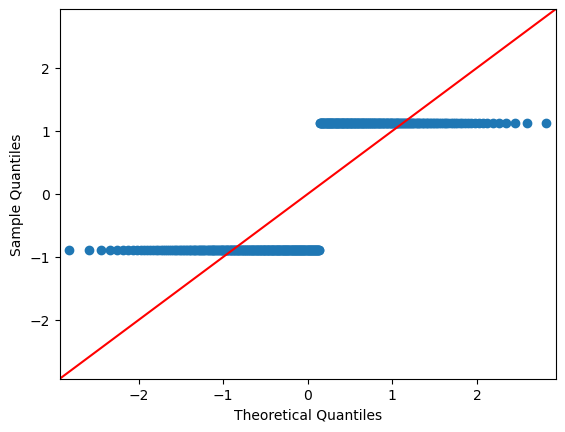

In [ ]:
#create Q-Q plot with 45-degree line added to plot
import plotly.express as px
import statsmodels.api as sm
fig = sm.qqplot(train['target'], line='45', fit = True)
plt.show()

- target is not normal distribution 

**Check Normality for Target statistically**

In [ ]:
k2, p = stats.normaltest(train['target'])
alpha = 1e-3
print("p = {:g}".format(p))
p = 8.4713e-19
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


- The null hypothesis can be rejected and the target not noramal distribured

**hypothesis testing**

**q1) there is a difference in the means of the specific gravity between patients with kidney stones and patients without kidney stones ?**


**The null hypothesis** :there is no difference in the means of the specific gravity between patients with kidney stones and patients without kidney stones. 

**The alternative hypothesis** :there is a difference in the means of the specific gravity between patients with kidney stones and patients without kidney stones.

In [ ]:
# Create the groups
with_stones = train[train["target"] == 1]
without_stones = train[train["target"] == 0]

# Conduct the t-test
t_statistic, p_value = stats.mannwhitneyu(with_stones["gravity"], without_stones["gravity"], alternative = 'two-sided')

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 28859.0
p-value: 1.7548577628190393e-10


In [ ]:
p = 8.4713e-19
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


**- Based on the statical test , I will Reject null hypothesis , that means i will reject that there is no difference in the means of the specific gravity between patients with kidney stones and patients without kidney stones.**  

**Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
x= train.drop(columns = ['target'], axis = 1)
y = train['target']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
# print shapes
print("shape of x_train is ",x_train.shape)
print("shape of x_test is ",x_test.shape)
print("shape of y_train is ",y_train.shape)
print("shape of x_train is ",y_test.shape)

shape of x_train is  (331, 6)
shape of x_test is  (83, 6)
shape of y_train is  (331,)
shape of x_train is  (83,)


**Building Algorithms**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Test different algorithms for classification 
random_forest = RandomForestClassifier()
svc = SVC()
gradient_boosting = GradientBoostingClassifier()
neural_network = MLPClassifier()
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()

In [ ]:
algorithms = [random_forest, svc, gradient_boosting, neural_network,logistic_regression,decision_tree]
for model in algorithms:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    print(f"{type(model).__name__}: Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1={f1}, AUC-ROC={auc_roc}")
    print("==========================")

RandomForestClassifier: Accuracy=0.6987951807228916, Precision=0.6857142857142857, Recall=0.631578947368421, F1=0.6575342465753424, AUC-ROC=0.6935672514619883
SVC: Accuracy=0.6385542168674698, Precision=0.6176470588235294, Recall=0.5526315789473685, F1=0.5833333333333334, AUC-ROC=0.6318713450292399
GradientBoostingClassifier: Accuracy=0.7349397590361446, Precision=0.7105263157894737, Recall=0.7105263157894737, F1=0.7105263157894737, AUC-ROC=0.7330409356725145
MLPClassifier: Accuracy=0.6867469879518072, Precision=0.6304347826086957, Recall=0.7631578947368421, F1=0.6904761904761905, AUC-ROC=0.6926900584795321
LogisticRegression: Accuracy=0.7469879518072289, Precision=0.7575757575757576, Recall=0.6578947368421053, F1=0.704225352112676, AUC-ROC=0.7400584795321637
DecisionTreeClassifier: Accuracy=0.5783132530120482, Precision=0.5384615384615384, Recall=0.5526315789473685, F1=0.5454545454545455, AUC-ROC=0.5763157894736842


**Choose Best Model**

In [ ]:
# Evaluate models and choose the best model
models = [logistic_regression, decision_tree, random_forest, svc, gradient_boosting, neural_network]
best_model = None
best_metrics = 0.0

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    avg_metrics = (accuracy + precision + recall + f1 + auc_roc) / 5  # Average of all metrics
    
    if avg_metrics > best_metrics:
        best_model = model
        best_metrics = avg_metrics

print("Best Model:")
print(type(best_model).__name__)
print()

Best Model:
LogisticRegression



**Prediction on test**

In [ ]:
test_predictions = best_model.predict(test)
# Display some predictions with corresponding IDs
predictions_df = pd.DataFrame({'id': test['id'], 'target': test_predictions})
print(predictions_df.head(10))

    id  target
0  414       0
1  415       0
2  416       1
3  417       0
4  418       0
5  419       0
6  420       0
7  421       1
8  422       0
9  423       0


**Submission file** 

In [ ]:
# Save the predictions
test['target'] = test_predictions
test[['id', 'target']].to_csv('predictions.csv', index=False)